## Importing  required Libraries and function

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [67]:
data = pd.read_csv('C:\\Users\\Babu\\Data_Documents\\Python Class\\Hackathon\\train.csv')

In [69]:
data.shape  

(381109, 12)

In [70]:
data=data.drop(columns=['id'])

### Exploratory Data Analysis (EDA) for Train DATA

In [72]:
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [73]:
data.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [74]:
data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [75]:
data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [76]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [77]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [78]:
data['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

In [79]:
data['Vehicle_Damage'].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [80]:
data['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [81]:
data['Gender'].value_counts()


Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [82]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [83]:
data[:4]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0


In [84]:
#Total Unique Values in each Columns
for i in data.columns:
    print(f'{i} :  {data[i].nunique()} ')

Gender :  2 
Age :  66 
Driving_License :  2 
Region_Code :  53 
Previously_Insured :  2 
Vehicle_Age :  3 
Vehicle_Damage :  2 
Annual_Premium :  48838 
Policy_Sales_Channel :  155 
Vintage :  290 
Response :  2 


In [85]:
data['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [86]:
data['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [87]:
class_counts = data["Response"].value_counts()
print(class_counts)
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Response
0    334399
1     46710
Name: count, dtype: int64
Imbalance Ratio: 0.14


### Imbalance Ratio so we have to Handle Imbalanced Data

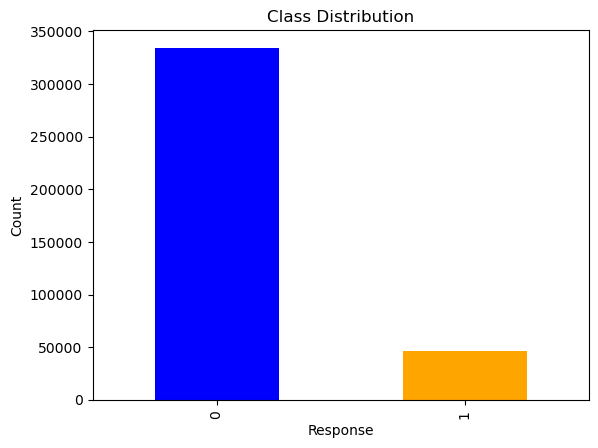

In [89]:
import matplotlib.pyplot as plt
class_counts.plot(kind="bar", color=["blue", "orange"])
plt.title("Class Distribution")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

In [90]:
data['Vehicle_Age'].unique() 

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [91]:
data['Vehicle_Age'].value_counts().sort_index()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [92]:
data['Vehicle_Age'].value_counts(normalize=True).sort_index()

Vehicle_Age
1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: proportion, dtype: float64

In [93]:
data


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [94]:
import pandas as pd
from ydata_profiling import ProfileReport 

In [95]:
profile = ProfileReport(data, explorative=True)

In [96]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
num_col=data.select_dtypes(include='number').columns

<Axes: >

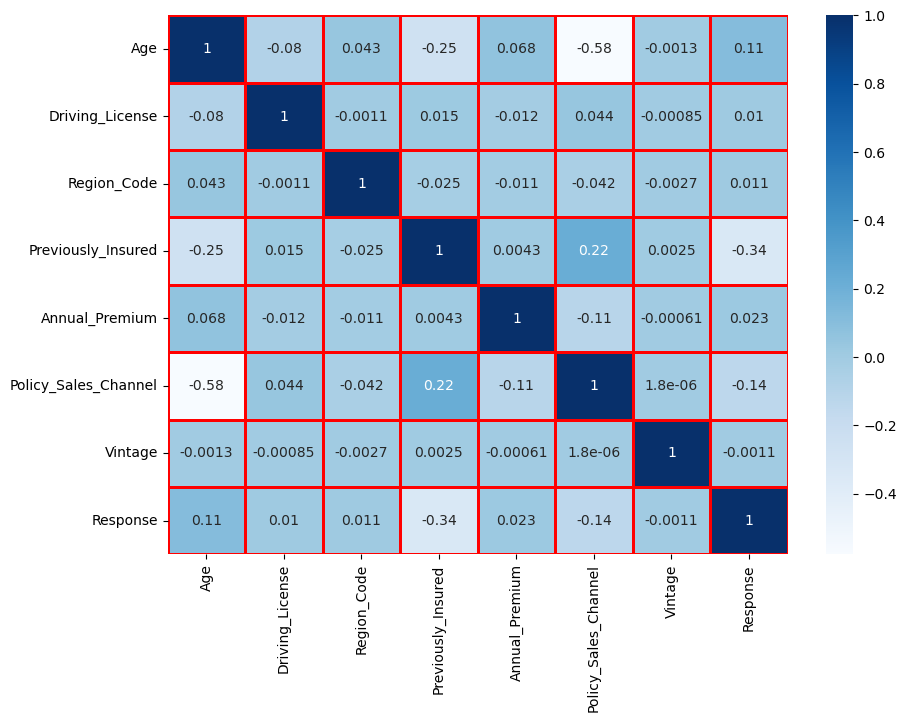

In [98]:
plt.figure(figsize=(10,7))
#sns.heatmap(data[num_col].corr(), annot=True)
sns.heatmap(data.select_dtypes(exclude=object).corr() , annot=True , linewidths=1 , cmap='Blues',linecolor="REd" )


### Preprocessing

In [100]:
data.shape

(381109, 11)

In [101]:

data['Gender'].replace({'Male':1 , 'Female':0 },inplace=True)
data['Vehicle_Damage'].replace({'Yes':1 , 'No':0 },inplace=True)
 

In [102]:
data.shape

(381109, 11)

In [103]:
data[:4]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0


### Feature Engineering 

In [104]:
### Using OneHotEncoder can transform the test dataframe
data=pd.get_dummies(data,columns=['Vehicle_Age'], dtype=int )

In [224]:
expected_columns = ['Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years']

In [226]:
for col in expected_columns:
    if col not in data.columns:
        data[col] = 0

In [228]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170.0,26.0,88,0,1,0,0
381105,1,30,1,37.0,1,0,40016.0,152.0,131,0,0,1,0
381106,1,21,1,30.0,1,0,35118.0,160.0,161,0,0,1,0
381107,0,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,1


In [230]:
 data[:4]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0


In [106]:
data.dtypes

Gender                     int64
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Damage             int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
Vehicle_Age_1-2 Year       int32
Vehicle_Age_< 1 Year       int32
Vehicle_Age_> 2 Years      int32
dtype: object

In [107]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170.0,26.0,88,0,1,0,0
381105,1,30,1,37.0,1,0,40016.0,152.0,131,0,0,1,0
381106,1,21,1,30.0,1,0,35118.0,160.0,161,0,0,1,0
381107,0,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,1


In [108]:
X = data.drop(columns=['Response'])
y = data['Response']

In [109]:
X.shape, y.shape


((381109, 12), (381109,))

In [262]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')

### Feature Engineering - Scaling the Data using Standard Scalar 

In [264]:
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

### Model Building 

In [266]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.33 , random_state=42 )

In [236]:
 X_train.shape , X_test.shape , y_train.shape , y_test.shape

((255343, 12), (125766, 12), (255343,), (125766,))

### Algorthim LogisticRegression

In [238]:
model = LogisticRegression()

In [117]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0.921545,0.333777,0.046208,0.121784,-0.919638,0.990294,0.574539,-1.587234,0.748795,-1.052609,-0.872788,4.775866
1,0.921545,2.396751,0.046208,-1.767879,-0.919638,-1.009801,0.172636,-1.587234,0.342443,0.950021,-0.872788,-0.209386
2,0.921545,0.527181,0.046208,0.121784,-0.919638,0.990294,0.449053,-1.587234,-1.521998,-1.052609,-0.872788,4.775866
3,0.921545,-1.148985,0.046208,-1.163187,1.087384,-1.009801,-0.113018,0.737321,0.581474,-1.052609,1.145754,-0.209386
4,-1.085134,-0.633242,0.046208,1.104409,1.087384,-1.009801,-0.178259,0.737321,-1.378580,-1.052609,1.145754,-0.209386
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0.921545,2.267815,0.046208,-0.029389,1.087384,-1.009801,-0.022912,-1.587234,-0.792954,0.950021,-0.872788,-0.209386
381105,0.921545,-0.568774,0.046208,0.802063,1.087384,-1.009801,0.549093,0.737321,-0.279037,-1.052609,1.145754,-0.209386
381106,0.921545,-1.148985,0.046208,0.272958,1.087384,-1.009801,0.264543,0.884912,0.079509,-1.052609,1.145754,-0.209386
381107,-1.085134,1.881007,0.046208,-0.936427,-0.919638,0.990294,0.816389,0.220753,-0.960275,-1.052609,-0.872788,4.775866


In [240]:
model.fit(X_train, y_train)

LogisticRegression()

In [242]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [120]:
print(f'Train Accuracy : {accuracy_score(y_train , train_pred)}')
print(f'classification_report : \n{classification_report (y_train , train_pred)}')
print(f'confusion_matrix :\n {confusion_matrix (y_train , train_pred)}')
print('\n','=====================================================','\n')
print(f' Test Accuracy : {accuracy_score(y_test , test_pred)}')
print(f'classification_report : \n{classification_report (y_test , test_pred)}')
print(f'confusion_matrix :\n {confusion_matrix (y_test , test_pred)}')

Train Accuracy : 0.8778309959544612
classification_report : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    224148
           1       0.50      0.00      0.00     31195

    accuracy                           0.88    255343
   macro avg       0.69      0.50      0.47    255343
weighted avg       0.83      0.88      0.82    255343

confusion_matrix :
 [[224143      5]
 [ 31190      5]]


 Test Accuracy : 0.8766280234721626
classification_report : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    110251
           1       0.00      0.00      0.00     15515

    accuracy                           0.88    125766
   macro avg       0.44      0.50      0.47    125766
weighted avg       0.77      0.88      0.82    125766

confusion_matrix :
 [[110250      1]
 [ 15515      0]]


In [244]:
final_3=model

### Model Evaluation and Tuning 

In [122]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on the original data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[107620   2631]
 [ 13924   1591]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93    110251
           1       0.38      0.10      0.16     15515

    accuracy                           0.87    125766
   macro avg       0.63      0.54      0.54    125766
weighted avg       0.82      0.87      0.83    125766


ROC AUC Score: 0.5393410970864294


In [123]:
X_copy =  X.copy()

In [124]:
X_copy.shape, X.shape

((381109, 12), (381109, 12))

In [125]:
under_sampling = RandomUnderSampler()
RF_unbalanced_model = RandomForestClassifier() 

In [126]:
train_scaled_underSample_X, train_y_under_sample = under_sampling.fit_resample(X_train, y_train)

In [127]:
type(train_scaled_underSample_X) , type(train_y_under_sample)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [128]:

train_data_scaled_underSample = pd.concat([train_scaled_underSample_X, train_y_under_sample], axis = 1)

In [129]:
y_train.value_counts()

Response
0    224148
1     31195
Name: count, dtype: int64

In [130]:
train_y_under_sample.value_counts()

Response
0    31195
1    31195
Name: count, dtype: int64

In [131]:
train_scaled_underSample_X.shape

(62390, 12)

In [132]:
columns = X.columns

<Axes: >

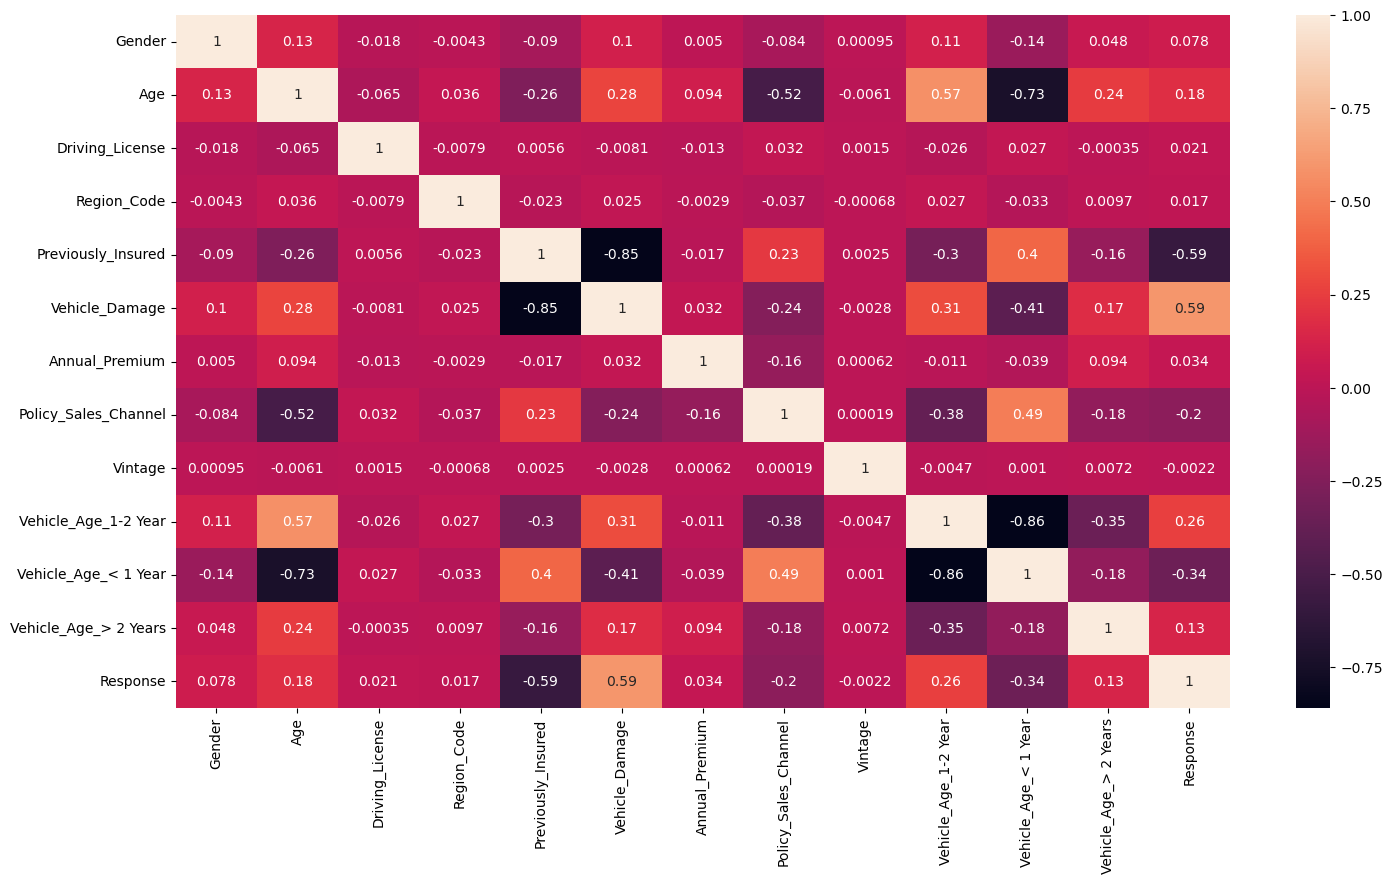

In [133]:
plt.figure(figsize = (17, 9))
sns.heatmap(train_data_scaled_underSample.corr(), annot = True)

In [134]:
def model_pred_results(train_x, test_x, train_y, test_y, model):
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    print('Train accuracy: ', accuracy_score(train_y, train_pred))
    print('Test accuracy: ', accuracy_score(test_y, test_pred))
    print('Train classification report: ', classification_report(train_y, train_pred))
    print('Test classification report: ', classification_report(test_y, test_pred))
    print('Train confusion matrix:', confusion_matrix(train_y, train_pred))
    print('Test confusion matrix:', confusion_matrix(test_y, test_pred))

    return accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)

### Using GridSearch to hyper tune single model

In [136]:
RF_unbalanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, X_test, train_y_under_sample, y_test, RF_unbalanced_model)

Train accuracy:  1.0
Test accuracy:  0.7128953771289538
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     31195
           1       1.00      1.00      1.00     31195

    accuracy                           1.00     62390
   macro avg       1.00      1.00      1.00     62390
weighted avg       1.00      1.00      1.00     62390

Test classification report:                precision    recall  f1-score   support

           0       0.98      0.69      0.81    110251
           1       0.29      0.88      0.43     15515

    accuracy                           0.71    125766
   macro avg       0.63      0.78      0.62    125766
weighted avg       0.89      0.71      0.76    125766

Train confusion matrix: [[31195     0]
 [    0 31195]]
Test confusion matrix: [[76009 34242]
 [ 1866 13649]]


In [137]:
param_grid = {
    'n_estimators' : [100, 150],
    # 'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 7],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [3, 5],
    'max_features': [0.3, 0.4]
}

In [138]:
grid = GridSearchCV(estimator = RF_unbalanced_model, param_grid = param_grid, cv = 5, verbose = 2, scoring = 'f1')

In [139]:
%%time
grid.fit(train_scaled_underSample_X, train_y_under_sample)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   1.5s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   1.5s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   1.4s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   1.4s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   1.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   2.4s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   2.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=  

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7], 'max_features': [0.3, 0.4],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [100, 150]},
             scoring='f1', verbose=2)

In [170]:
grid.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.4, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=150)

In [172]:
model_F1=grid.best_estimator_

In [141]:
grid.best_score_


0.8196972166054854

In [142]:
grid.best_estimator_.oob_score

False

In [143]:
grid.feature_names_in_

array(['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'], dtype=object)

In [144]:
model = RandomForestClassifier(max_depth=7, max_features=0.4, min_samples_leaf=5, min_samples_split=5)
model.fit(train_scaled_underSample_X, train_y_under_sample)

RandomForestClassifier(max_depth=7, max_features=0.4, min_samples_leaf=5,
                       min_samples_split=5)

In [ ]:
model = RandomForestClassifier(max_depth=7, max_features=0.4, min_samples_leaf=5, min_samples_split=5)
model.fit(train_scaled_underSample_X, train_y_under_sample)

In [145]:
model.feature_importances_

array([0.0008995 , 0.07294521, 0.00092089, 0.00565139, 0.34463609,
       0.43777911, 0.0041479 , 0.04629957, 0.00229949, 0.01535484,
       0.0659391 , 0.00312692])

In [192]:

model.feature_names_in_

array(['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'], dtype=object)

<Axes: >

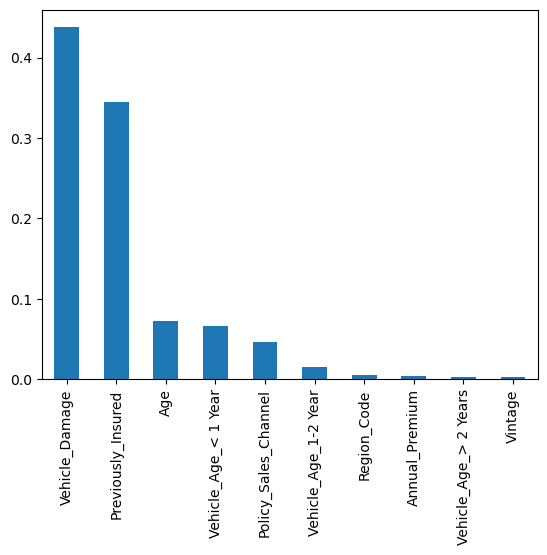

In [147]:
pd.Series(model.feature_importances_, index = model.feature_names_in_).sort_values(ascending = False)[:10].plot(kind = 'bar')

In [148]:
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, X_test, train_y_under_sample, y_test, model)

Train accuracy:  0.7969866965859913
Test accuracy:  0.6937407566432899
Train classification report:                precision    recall  f1-score   support

           0       0.91      0.66      0.76     31195
           1       0.73      0.93      0.82     31195

    accuracy                           0.80     62390
   macro avg       0.82      0.80      0.79     62390
weighted avg       0.82      0.80      0.79     62390

Test classification report:                precision    recall  f1-score   support

           0       0.99      0.66      0.79    110251
           1       0.28      0.93      0.43     15515

    accuracy                           0.69    125766
   macro avg       0.63      0.80      0.61    125766
weighted avg       0.90      0.69      0.75    125766

Train confusion matrix: [[20569 10626]
 [ 2040 29155]]
Test confusion matrix: [[72752 37499]
 [ 1018 14497]]


In [149]:
#train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, X_test, train_y_under_sample, y_test, RF_unbalanced_model)

In [154]:
from imblearn.over_sampling import RandomOverSampler

In [156]:
over_sampling = RandomOverSampler()

In [246]:
y_train.value_counts()

Response
0    224148
1     31195
Name: count, dtype: int64

In [250]:
train_X_os, train_y_os = over_sampling.fit_resample(X_train,y_train)

In [248]:
train_y_os.value_counts()

Response
1    224148
0    224148
Name: count, dtype: int64

In [252]:
train_accuracy, test_accuracy = model_pred_results(train_X_os, X_test, train_y_os, y_test, model)


Train accuracy:  0.7828153719863662
Test accuracy:  0.6409920010177631
Train classification report:                precision    recall  f1-score   support

           0       0.96      0.59      0.73    224148
           1       0.70      0.97      0.82    224148

    accuracy                           0.78    448296
   macro avg       0.83      0.78      0.77    448296
weighted avg       0.83      0.78      0.77    448296

Test classification report:                precision    recall  f1-score   support

           0       0.99      0.59      0.74    110251
           1       0.25      0.97      0.40     15515

    accuracy                           0.64    125766
   macro avg       0.62      0.78      0.57    125766
weighted avg       0.90      0.64      0.70    125766

Train confusion matrix: [[132766  91382]
 [  5981 218167]]
Test confusion matrix: [[65514 44737]
 [  414 15101]]


In [200]:
%%time
grid.fit(train_X_os, train_y_os)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=  13.3s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=  14.8s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=  12.1s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=  13.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=  13.9s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=  16.9s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=  19.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=  

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7], 'max_features': [0.3, 0.4],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [100, 150]},
             scoring='f1', verbose=2)

In [254]:
import joblib

In [256]:
model_f3=model_pred_results

In [258]:
joblib.dump(model_F1,'jobchg__modelf3.pkl')

['jobchg__modelf3.pkl']

In [216]:
grid.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.4, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=150)

In [218]:
model_f2=grid.best_estimator_

In [220]:
import joblib

In [222]:
joblib.dump(model_F1,'jobchg__modelf2.pkl')

['jobchg__modelf2.pkl']

In [ ]:
!pip install imbalanced-learn

In [ ]:
!python --version

### pickling the model

In [174]:
import joblib

In [178]:
joblib.dump(model_F1,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over_sampling = RandomOverSampler()

In [ ]:
y_train.value_counts()

In [ ]:
train_X_os, train_y_os = over_sampling.fit_resample(X_train,y_train)

In [ ]:
train_y_os.value_counts()

In [180]:

train_accuracy, test_accuracy = model_pred_results(train_X_os, X_test, train_y_os, y_test, model)

#train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, X_test, train_y_under_sample, y_test, model)

Train accuracy:  0.7959584738654817
Test accuracy:  0.6902819521969372
Train classification report:                precision    recall  f1-score   support

           0       0.91      0.65      0.76    224148
           1       0.73      0.94      0.82    224148

    accuracy                           0.80    448296
   macro avg       0.82      0.80      0.79    448296
weighted avg       0.82      0.80      0.79    448296

Test classification report:                precision    recall  f1-score   support

           0       0.99      0.66      0.79    110251
           1       0.28      0.94      0.43     15515

    accuracy                           0.69    125766
   macro avg       0.63      0.80      0.61    125766
weighted avg       0.90      0.69      0.74    125766

Train confusion matrix: [[146343  77805]
 [ 13666 210482]]
Test confusion matrix: [[72264 37987]
 [  965 14550]]


In [196]:
model = RandomForestClassifier(max_depth=7, max_features=0.4, min_samples_leaf=5, min_samples_split=5)
model.fit(train_X_os, train_y_os)
train_accuracy, test_accuracy = model_pred_results(train_X_os, X_test, train_y_os, y_test, model)

Train accuracy:  0.7961703874225958
Test accuracy:  0.6893039454224512
Train classification report:                precision    recall  f1-score   support

           0       0.92      0.65      0.76    224148
           1       0.73      0.94      0.82    224148

    accuracy                           0.80    448296
   macro avg       0.82      0.80      0.79    448296
weighted avg       0.82      0.80      0.79    448296

Test classification report:                precision    recall  f1-score   support

           0       0.99      0.65      0.79    110251
           1       0.28      0.94      0.43     15515

    accuracy                           0.69    125766
   macro avg       0.63      0.80      0.61    125766
weighted avg       0.90      0.69      0.74    125766

Train confusion matrix: [[146048  78100]
 [ 13276 210872]]
Test confusion matrix: [[72113 38138]
 [  937 14578]]


###API Creation - Pickled File creation

In [198]:
import joblib
joblib.dump(model_pred_results,'jobchg_model.pkl')

['jobchg_model.pkl']

In [ ]:
import joblib
joblib.dump(model_pred_results,'jobchg_model.pkl')

In [ ]:
joblib.dump(model, "jobchg_pipeline_model.pkl")

In [182]:
RF_balanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_results(train_X_os, X_test, train_y_os, y_test, RF_balanced_model)

Train accuracy:  0.9999509252815104
Test accuracy:  0.8478444094588362
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    224148
           1       1.00      1.00      1.00    224148

    accuracy                           1.00    448296
   macro avg       1.00      1.00      1.00    448296
weighted avg       1.00      1.00      1.00    448296

Test classification report:                precision    recall  f1-score   support

           0       0.90      0.93      0.91    110251
           1       0.35      0.27      0.30     15515

    accuracy                           0.85    125766
   macro avg       0.62      0.60      0.61    125766
weighted avg       0.83      0.85      0.84    125766

Train confusion matrix: [[224126     22]
 [     0 224148]]
Test confusion matrix: [[102490   7761]
 [ 11375   4140]]


In [186]:
import joblib


In [188]:
joblib.dump(model_pred_results,'jobchg_model.pkl')

['jobchg_model.pkl']